# CSCS

In [10]:
import numpy as np
import networkx as nx
from data_generate import generate_random_MVN_data
from CSCS import CSCS, CSCS_numba_fit

In [11]:
np.random.seed(3689)

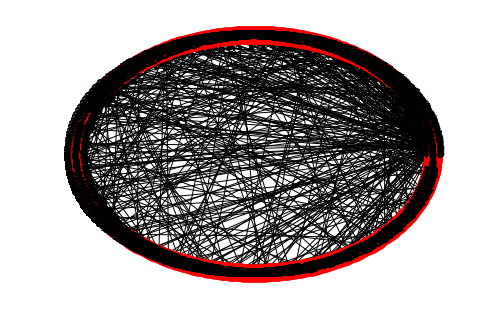

In [12]:
Y = generate_random_MVN_data(p = 500, a = 0.5, b = 1, diag_a= 0.99, diag_b=1.01,plot = True)

## Numba 

In [13]:
%timeit L,A,G = CSCS_numba_fit(Y=Y,l = 1)

11.4 s ± 316 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Parallel implementation with 3 workers

In [14]:
cscs = CSCS(Y = Y,l = 1, num_workers=3)

In [15]:
%timeit L,A,G = cscs.fit()

12.3 s ± 309 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Serial implementation with 1 worker 

In [16]:
cscs = CSCS(Y = Y,l = 1, num_workers=1)

In [17]:
%timeit L,A,G = cscs.fit()

11.7 s ± 785 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Numba implementation performs the fastest!

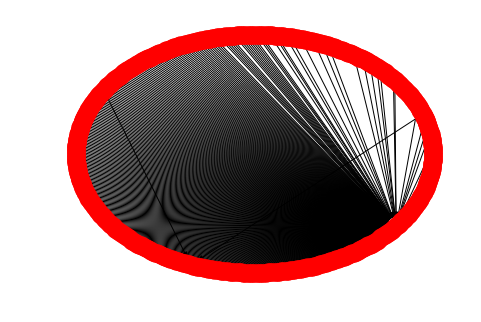

In [33]:
cscs = CSCS(Y = Y,l = 2.1872, num_workers=3)
L,A,G = cscs.fit()
nx.draw_shell(G, with_labels=False, font_weight='bold')